# Proyecto Final

In [1]:
# Import Library
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
path='C:\\Users\\Gabo\\Documents\\Gabriel Mendoza\\Business\\Crehana\\Taller Data Science Retail\\02 Materiales\\01 Work\\01 Bases de Datos\\Stores\\Features data set.csv'
df1_features=pd.read_csv(path)
df1_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [3]:
path='C:\\Users\\Gabo\\Documents\\Gabriel Mendoza\\Business\\Crehana\\Taller Data Science Retail\\02 Materiales\\01 Work\\01 Bases de Datos\\Stores\\sales data-set.csv'
df2_sales=pd.read_csv(path)
df2_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [4]:
path='C:\\Users\\Gabo\\Documents\\Gabriel Mendoza\\Business\\Crehana\\Taller Data Science Retail\\02 Materiales\\01 Work\\01 Bases de Datos\\Stores\\stores data-set.csv'
df3_stores=pd.read_csv(path)
df3_stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


### 1.- Preparación de la base de datos

In [5]:
#Aquí calculamos el # de departamentos que tiene una tienda
df2_count=df2_sales.groupby(['Store','Date','IsHoliday'],as_index=False)['Dept'].count()
df2_count

,Store,Date,IsHoliday,Dept
0,1,01/04/2011,False,71
1,1,01/06/2012,False,71
2,1,01/07/2011,False,69
3,1,01/10/2010,False,73
4,1,02/03/2012,False,72
...,...,...,...,...
6430,45,30/07/2010,False,68
6431,45,30/09/2011,False,68
6432,45,30/12/2011,True,68
6433,45,31/08/2012,False,68


In [6]:
#calculamos la venta que las tiendas tienen por semana
df2_weekly=df2_sales.groupby(['Store','Date','IsHoliday'],as_index=False)['Weekly_Sales'].sum()

In [7]:
#generamos una llave para poder unir las bases de datos
df2_count['Key']=df2_count['Store'].astype(str)+'-'+df2_sales['Date']

In [8]:
df2_weekly['Key']=df2_weekly['Store'].astype(str)+'-'+df2_weekly['Date']

In [9]:
#unimos nuestras bases
df2=pd.merge(df2_count,df2_weekly, on='Key', how='left')

In [10]:
df2.head()

,Store_x,Date_x,IsHoliday_x,Dept,Key,Store_y,Date_y,IsHoliday_y,Weekly_Sales
0,1,01/04/2011,False,71,1-05/02/2010,1,05/02/2010,False,1643690.90
1,1,01/06/2012,False,71,1-12/02/2010,1,12/02/2010,True,1641957.44
2,1,01/07/2011,False,69,1-19/02/2010,1,19/02/2010,False,1611968.17
3,1,01/10/2010,False,73,1-26/02/2010,1,26/02/2010,False,1409727.59
4,1,02/03/2012,False,72,1-05/03/2010,1,05/03/2010,False,1554806.68


In [11]:
# compruebo que no existan missing values en weekly sales
df2['Weekly_Sales'].isna().sum()

0

In [12]:
#selecciono únicamente las columnas que necesito
df2=df2[['Store_x','Date_x','Dept','Weekly_Sales','IsHoliday_x']]

In [13]:
# les cambio el nombre
df2['Store']=df2['Store_x']
df2['IsHoliday']=df2['IsHoliday_x']
df2['Date']=df2['Date_x']

In [14]:
# me quedo con las variables que necesito y tengo mi base final para analizar
df2=df2[['Store','Date','Dept','Weekly_Sales','IsHoliday']]
df2

,Store,Date,Dept,Weekly_Sales,IsHoliday
0,1,01/04/2011,71,1643690.90,False
1,1,01/06/2012,71,1641957.44,False
2,1,01/07/2011,69,1611968.17,False
3,1,01/10/2010,73,1409727.59,False
4,1,02/03/2012,72,1554806.68,False
...,...,...,...,...,...
6430,45,30/07/2010,68,712425.76,False
6431,45,30/09/2011,68,750182.71,False
6432,45,30/12/2011,68,765270.02,True
6433,45,31/08/2012,68,813630.44,False


Preparamos la base con el precio de la gasolina y la temperatura

In [15]:
df1=df1_features.groupby(['Date','Store'],as_index=False)['Temperature','Fuel_Price'].mean()

<ipython-input-15-ff793821a33c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df1_features.groupby(['Date','Store'],as_index=False)['Temperature','Fuel_Price'].mean()


Finalmente: unimos ambas bases de datos

In [16]:
#creamos la llave para ambas bases
df2['Key']=df2['Store'].astype(str)+'-'+df2['Date']
df1['Key']=df1['Store'].astype(str)+'-'+df1['Date']

In [17]:
#mezclamos las bases
df3=pd.merge(df2,df1, on='Key', how='left')
df3

,Store_x,Date_x,Dept,Weekly_Sales,IsHoliday,Key,Date_y,Store_y,Temperature,Fuel_Price
0,1,01/04/2011,71,1643690.90,False,1-01/04/2011,01/04/2011,1,59.17,3.524
1,1,01/06/2012,71,1641957.44,False,1-01/06/2012,01/06/2012,1,77.95,3.501
2,1,01/07/2011,69,1611968.17,False,1-01/07/2011,01/07/2011,1,85.55,3.524
3,1,01/10/2010,73,1409727.59,False,1-01/10/2010,01/10/2010,1,71.89,2.603
4,1,02/03/2012,72,1554806.68,False,1-02/03/2012,02/03/2012,1,60.96,3.630
...,...,...,...,...,...,...,...,...,...,...
6430,45,30/07/2010,68,712425.76,False,45-30/07/2010,30/07/2010,45,79.78,2.781
6431,45,30/09/2011,68,750182.71,False,45-30/09/2011,30/09/2011,45,70.66,3.645
6432,45,30/12/2011,68,765270.02,True,45-30/12/2011,30/12/2011,45,37.79,3.389
6433,45,31/08/2012,68,813630.44,False,45-31/08/2012,31/08/2012,45,75.09,3.867


In [18]:
#Nos quedamos con la base final
df3=df3[['Date_x','Store_x','Weekly_Sales','Temperature','Fuel_Price']]

In [19]:
df3['Store']=df3['Store_x']
df3['Date']=df3['Date_x']

<ipython-input-19-f50d866021b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Store']=df3['Store_x']
<ipython-input-19-f50d866021b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date']=df3['Date_x']


In [20]:
df3=df3[['Date','Store','Weekly_Sales','Temperature','Fuel_Price']]
df3

,Date,Store,Weekly_Sales,Temperature,Fuel_Price
0,01/04/2011,1,1643690.90,59.17,3.524
1,01/06/2012,1,1641957.44,77.95,3.501
2,01/07/2011,1,1611968.17,85.55,3.524
3,01/10/2010,1,1409727.59,71.89,2.603
4,02/03/2012,1,1554806.68,60.96,3.630
...,...,...,...,...,...
6430,30/07/2010,45,712425.76,79.78,2.781
6431,30/09/2011,45,750182.71,70.66,3.645
6432,30/12/2011,45,765270.02,37.79,3.389
6433,31/08/2012,45,813630.44,75.09,3.867


### 2.- Análisis visual

Lo primero que haremos será pasar la fecha como índice y ordenar los datos conforme al tiempo

In [21]:
df3.set_index('Date',inplace=True)

In [22]:
df3.sort_index(ascending=False,inplace=True)

In [23]:
df3

,Store,Weekly_Sales,Temperature,Fuel_Price
Date,,,,
31/12/2010,45,786561.61,29.67,3.179
31/12/2010,22,1081420.96,28.49,3.177
31/12/2010,38,322868.56,45.64,3.148
31/12/2010,30,443810.78,47.19,2.943
31/12/2010,7,495543.28,13.76,2.829
...,...,...,...,...
01/04/2011,14,2623469.95,37.27,3.638
01/04/2011,33,237405.82,71.41,3.772
01/04/2011,15,652122.44,30.34,3.811


Lo segundo será analizar la relación que existe entre las ventas semanales y la temperatura de cada día. El objetivo es ver si existe alguna relación

In [24]:
%matplotlib inline 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

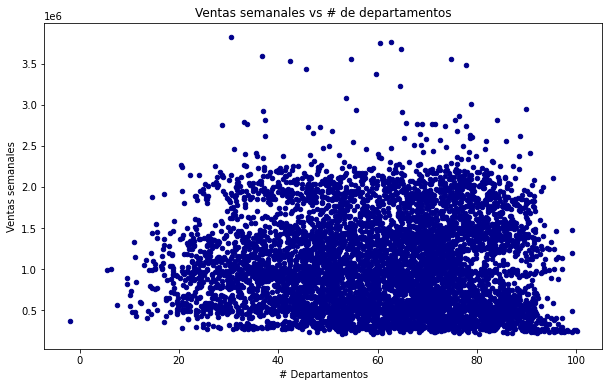

In [26]:
df3.plot(kind='scatter', x='Temperature', y='Weekly_Sales', figsize=(10, 6), color='darkblue')

plt.title('Ventas semanales vs Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Ventas semanales')


plt.show()

#### Podemos ver que no existe relación entre la temperatura y las ventas

Ahora analizaremos la relación que tiene el precio de la gasolina con las ventas.

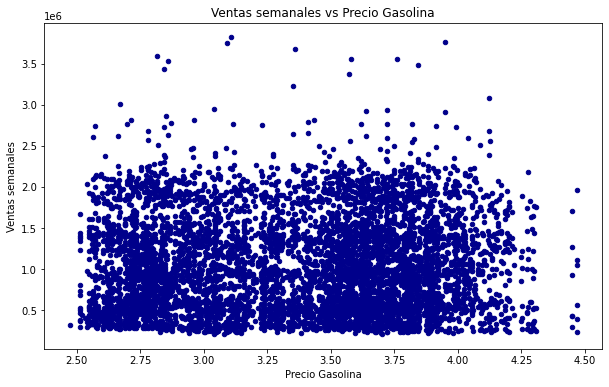

In [27]:
df3.plot(kind='scatter', x='Fuel_Price', y='Weekly_Sales', figsize=(10, 6), color='darkblue')

plt.title('Ventas semanales vs Precio Gasolina')
plt.xlabel('Precio Gasolina')
plt.ylabel('Ventas semanales')


plt.show()

Podemos ver que no existe relación entre el precio de la gasolina y las ventas

Finalmente analizaremos las ventas conforme al tiempo. Para esto primero se deben agrupar las ventas por fecha

In [28]:
df3_weekly=df3.groupby('Date',as_index=True)['Weekly_Sales'].sum()
df3_weekly

Date
01/04/2011    49809807.40
01/06/2012    47255807.39
01/07/2011    45640235.09
01/10/2010    42963055.00
02/03/2012    44530861.43
                 ...     
30/07/2010    44205641.79
30/09/2011    47543912.28
30/12/2011    45694467.88
31/08/2012    46174612.02
31/12/2010    45968824.47
Name: Weekly_Sales, Length: 143, dtype: float64

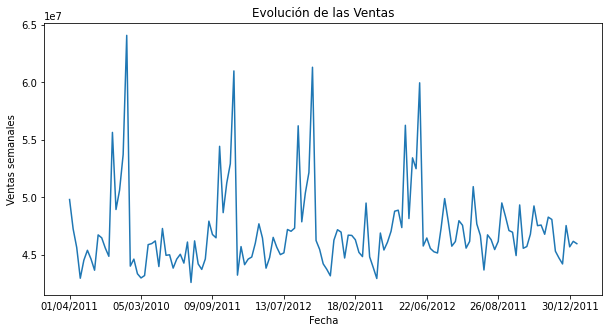

In [29]:
df3_weekly.plot(kind='line', figsize=(10,5))
plt.xlabel('Fecha')
plt.ylabel('Ventas semanales')
plt.title('Evolución de las Ventas')


plt.show()

### 3.- Análisis Estadístico

In [30]:
df3

,Store,Weekly_Sales,Temperature,Fuel_Price
Date,,,,
31/12/2010,45,786561.61,29.67,3.179
31/12/2010,22,1081420.96,28.49,3.177
31/12/2010,38,322868.56,45.64,3.148
31/12/2010,30,443810.78,47.19,2.943
31/12/2010,7,495543.28,13.76,2.829
...,...,...,...,...
01/04/2011,14,2623469.95,37.27,3.638
01/04/2011,33,237405.82,71.41,3.772
01/04/2011,15,652122.44,30.34,3.811


Obtenemos las estadísticas por tienda a lo largo del tiempo

In [31]:
df3.describe(include='all').round(0)

,Store,Weekly_Sales,Temperature,Fuel_Price
count,6435.0,6435.0,6435.0,6435.0
mean,23.0,1046382.0,61.0,3.0
std,13.0,564505.0,18.0,0.0
min,1.0,209986.0,-2.0,2.0
25%,12.0,552898.0,47.0,3.0
50%,23.0,958875.0,63.0,3.0
75%,34.0,1420159.0,75.0,4.0
max,45.0,3818686.0,100.0,4.0


Veamos la relación estadística que tienen la temperatura y el precio de la gasolina con las ventas

In [32]:
df3.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price
Store,1.000000,-0.335879,-0.022659,0.060023
Weekly_Sales,-0.335879,1.000000,-0.030553,0.031747
Temperature,-0.022659,-0.030553,1.000000,0.144982
Fuel_Price,0.060023,0.031747,0.144982,1.000000


Notamos que la correlación entre Las ventas y la temperatura y el precio de la gasolina es casi 0, es decir, no existe relación lineal.

#### Un coeficiente que nos indica la variabilidad de tus datos es el Coeficiente de variación: te indica qué tan variable es tu instrumento.
#### Calcularemos Coef de Var: STD/Mean

El coeficiente de variación por si solo no nos da mucha información. El coeficiente sirve para poder comparar grupos de datos y ver si un grupo tiene más variabilidad que otro

In [35]:
media=df3.mean()
desvest=df3.std()

In [36]:
coef_var=desvest/media
coef_var

Store           0.564704
Weekly_Sales    0.539482
Temperature     0.304052
Fuel_Price      0.136670
dtype: float64

El precio de la gasolina es el menos variable